# 1.LEO dataset

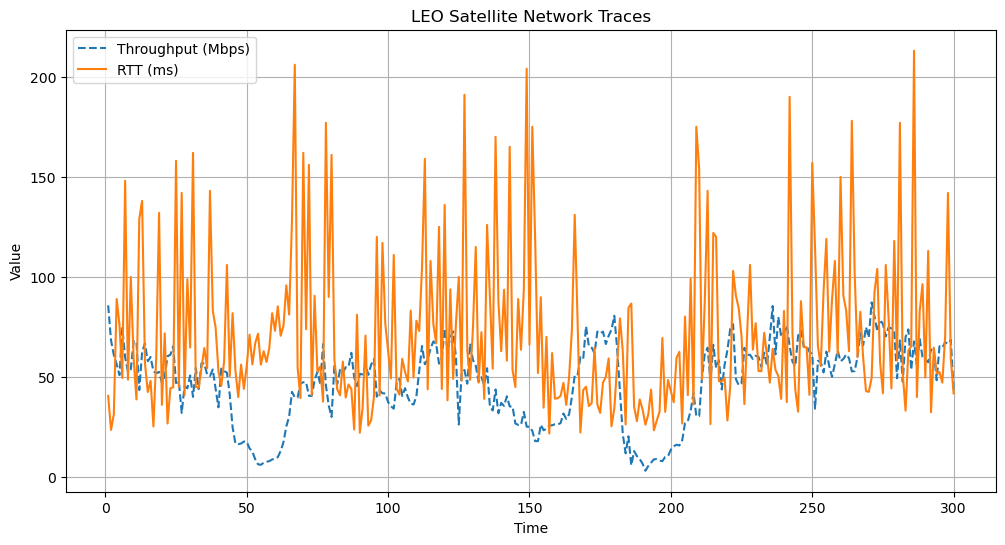

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv("/root/repos/ABR-Starlink/src/train/segment_1.log")

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['speed'], label='Throughput (Mbps)', linestyle="--")
plt.plot(df['time'], df['rtt'], label='RTT (ms)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LEO Satellite Network Traces')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

# Correlation analysis
correlation = df['speed'].corr(df['rtt'])
print(f"\nCorrelation between speed and RTT: {correlation:.2f}")

Summary Statistics:
             time       speed         rtt
count  300.000000  300.000000  300.000000
mean   150.500000   47.586700   71.739667
std     86.746758   19.759613   39.185563
min      1.000000    3.210000   21.800000
25%     75.750000   34.725000   44.100000
50%    150.500000   51.750000   59.800000
75%    225.250000   62.125000   88.050000
max    300.000000   87.300000  213.000000

Correlation between speed and RTT: 0.03


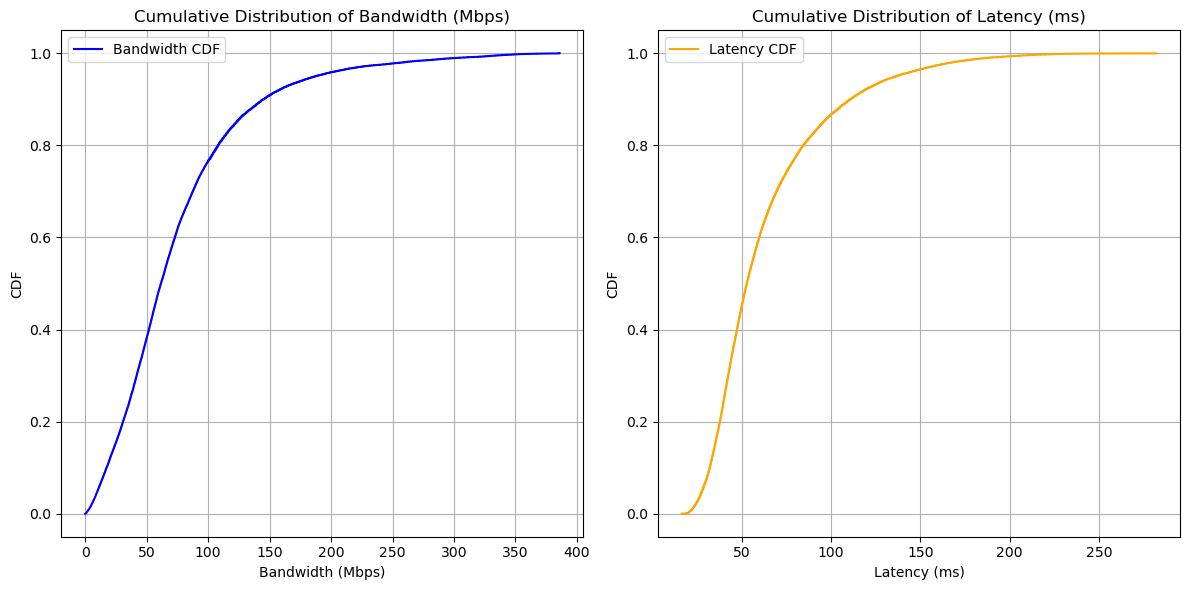

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Step 1: Read all log files
file_pattern = "/root/repos/ABR-Starlink/src/train/segment_*.log"
files = glob.glob(file_pattern)

# Initialize an empty DataFrame
all_data_leo = pd.DataFrame()

# Step 2: Concatenate all files
for file in files:
    df = pd.read_csv(file)
    all_data_leo = pd.concat([all_data_leo, df], ignore_index=True)

# Step 3: Compute CDF for speed and RTT
def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

bandwidth_sorted_leo, bandwidth_cdf_leo = compute_cdf(all_data_leo['speed'])
# rtt_sorted, rtt_cdf = compute_cdf(all_data_fcc18['rtt'])
rtt_sorted_leo, rtt_cdf_leo = compute_cdf(all_data_leo[all_data_leo['rtt'] <= 500]['rtt'])


# Step 4: Plot CDF for speed and RTT
plt.figure(figsize=(12, 6))

# Bandwidth (speed) CDF
plt.subplot(1, 2, 1)
plt.plot(bandwidth_sorted_leo, bandwidth_cdf_leo, label="Bandwidth CDF", color="blue")
plt.xlabel("Bandwidth (Mbps)")
plt.ylabel("CDF")
plt.title("Cumulative Distribution of Bandwidth (Mbps)")
plt.grid(True)
plt.legend()

# Delay (RTT) CDF
plt.subplot(1, 2, 2)
plt.plot(rtt_sorted_leo, rtt_cdf_leo, label="Latency CDF", color="orange")
plt.xlabel("Latency (ms)")
plt.ylabel("CDF")
plt.title("Cumulative Distribution of Latency (ms)")
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [18]:
print(all_data.describe())

               time         speed           rtt
count  41100.000000  41100.000000  41100.000000
mean     150.500000     74.982648     65.922783
std       86.603113     57.897838     81.704104
min        1.000000      0.000000     16.500000
25%       75.750000     36.700000     40.275000
50%      150.500000     61.600000     53.000000
75%      225.250000     96.600000     76.400000
max      300.000000    386.000000   3659.000000


# 2.Oboe

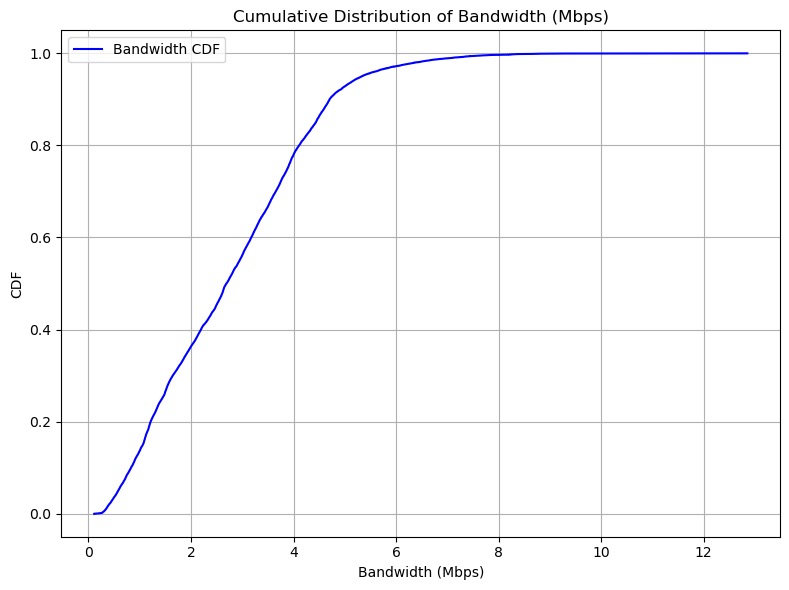

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Step 1: Read all trace files
file_pattern = "/root/repos/ABR-Starlink/datasets/oboe/trace_*.txt"  # Pattern for trace files
files = glob.glob(file_pattern)

# Initialize an empty DataFrame
all_data_oboe = pd.DataFrame()

# Step 2: Concatenate all files
for file in files:
    # Read each file with tab-separated values and assign column names
    df = pd.read_csv(file, sep="\t", header=None, names=["time", "bandwidth"])
    all_data_oboe = pd.concat([all_data_oboe, df], ignore_index=True)

# Step 3: Compute CDF for bandwidth
def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

bandwidth_sorted_oboe, bandwidth_cdf_oboe = compute_cdf(all_data_oboe['bandwidth'])

# Step 4: Plot CDF for bandwidth
plt.figure(figsize=(8, 6))
plt.plot(bandwidth_sorted_oboe, bandwidth_cdf_oboe, label="Bandwidth CDF", color="blue")
plt.xlabel("Bandwidth (Mbps)")
plt.ylabel("CDF")
plt.title("Cumulative Distribution of Bandwidth (Mbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# 3.fcc18

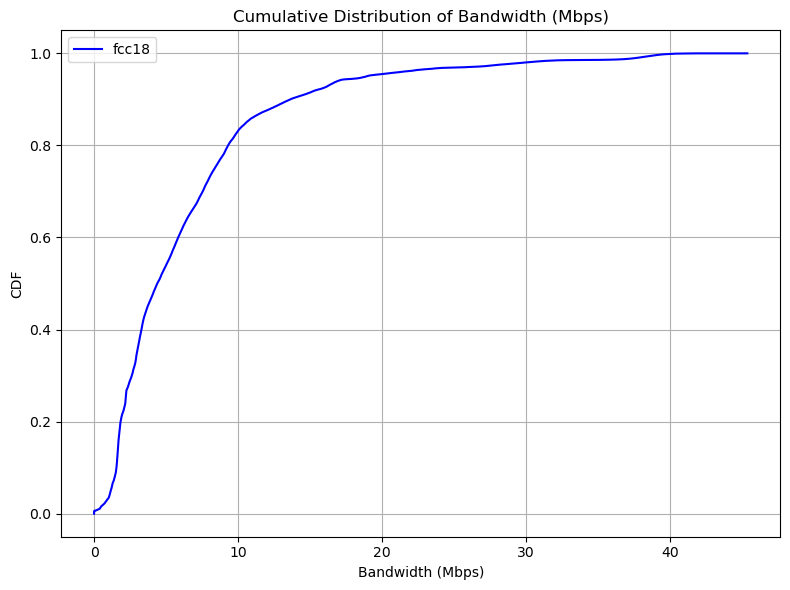

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Step 1: Read all trace files
file_pattern = "/root/repos/ABR-Starlink/datasets/fcc18/trace_*"  # Pattern for trace files
files = glob.glob(file_pattern)

# Initialize an empty DataFrame
all_data_fcc18 = pd.DataFrame()

# Step 2: Concatenate all files
for file in files:
    # Read each file with tab-separated values and assign column names
    df = pd.read_csv(file, sep=" ", header=None, names=["time", "bandwidth"])
    all_data_fcc18 = pd.concat([all_data_fcc18, df], ignore_index=True)

# Step 3: Compute CDF for bandwidth
def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

bandwidth_sorted_fcc18, bandwidth_cdf_fcc18 = compute_cdf(all_data_fcc18['bandwidth'])

# Step 4: Plot CDF for bandwidth
plt.figure(figsize=(8, 6))
plt.plot(bandwidth_sorted_fcc18, bandwidth_cdf_fcc18, label="fcc18", color="blue")
plt.xlabel("Bandwidth (Mbps)")
plt.ylabel("CDF")
plt.title("Cumulative Distribution of Bandwidth (Mbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
all_data.describe()

,time,bandwidth
count,11235.000000,11235.000000
mean,123.452247,347.986738
std,71.936261,378.805008
min,1.000000,0.000000
25%,62.000000,98.000000
50%,123.000000,124.000000
75%,184.000000,550.000000
max,300.000000,1870.000000


# 3G

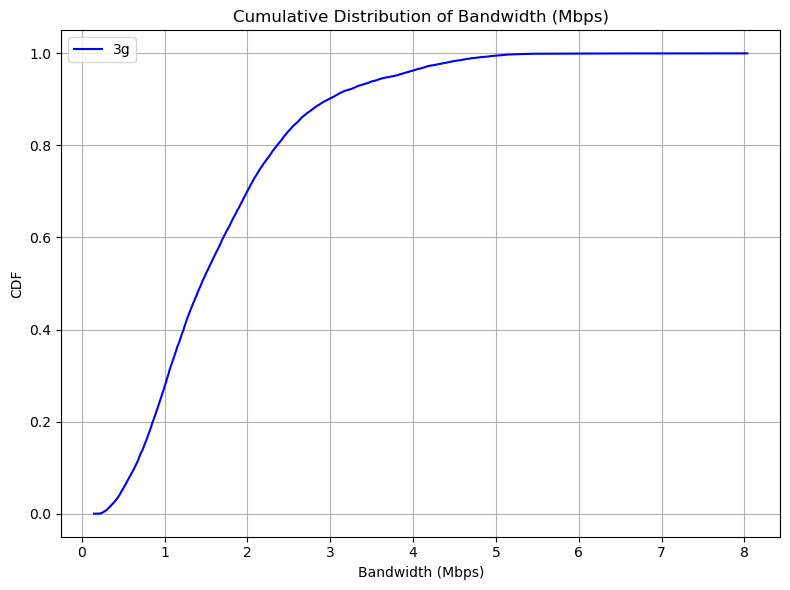

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Step 1: Read all trace files
file_pattern = "/root/repos/ABR-Starlink/datasets/3g/norway_*"  # Pattern for trace files
files = glob.glob(file_pattern)

# Initialize an empty DataFrame
all_data_3g = pd.DataFrame()

# Step 2: Concatenate all files
for file in files:
    # Read each file with tab-separated values and assign column names
    df = pd.read_csv(file, sep="\t", header=None, names=["time", "bandwidth"])
    all_data_3g = pd.concat([all_data_3g, df], ignore_index=True)

# Step 3: Compute CDF for bandwidth
def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

bandwidth_sorted_3g, bandwidth_cdf_3g = compute_cdf(all_data_3g['bandwidth'])

# Step 4: Plot CDF for bandwidth
plt.figure(figsize=(8, 6))
plt.plot(bandwidth_sorted_3g, bandwidth_cdf_3g, label="3g", color="blue")
plt.xlabel("Bandwidth (Mbps)")
plt.ylabel("CDF")
plt.title("Cumulative Distribution of Bandwidth (Mbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


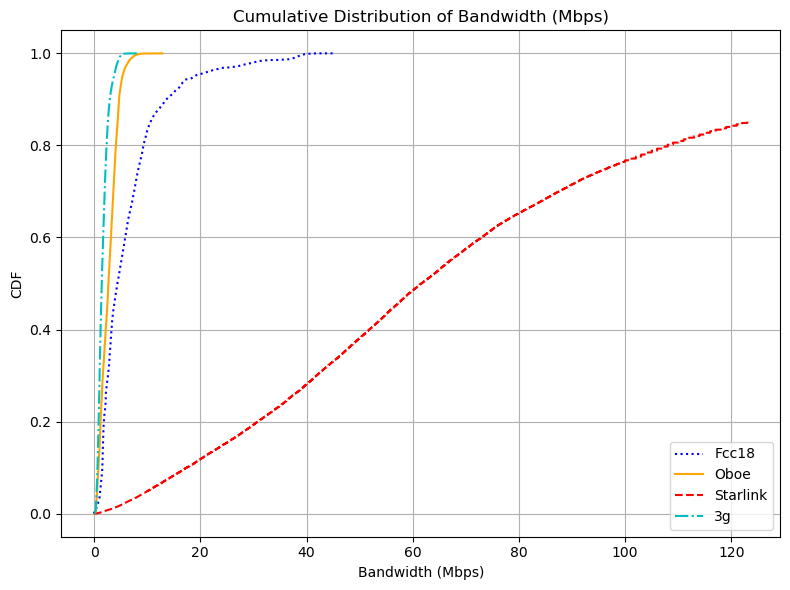

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(bandwidth_sorted_fcc18, bandwidth_cdf_fcc18, label="Fcc18", color="blue", linestyle=':')
plt.plot(bandwidth_sorted_oboe, bandwidth_cdf_oboe, label="Oboe", color="orange")
plt.plot(bandwidth_sorted_leo[:35000], bandwidth_cdf_leo[:35000], label="Starlink", color="red", linestyle='--')
plt.plot(bandwidth_sorted_3g, bandwidth_cdf_3g, label="3g", color="c", linestyle='-.')
plt.xlabel("Bandwidth (Mbps)")
plt.ylabel("CDF")
plt.title("Cumulative Distribution of Bandwidth (Mbps)")
plt.grid(True)
plt.legend()
plt.tight_layout()